# _Workshop 1_
## <center>Linear Rgression </center>

## Objectives


- Linear Regression Description|
- LM Modelisation  $y= mx +c$ 
- Linear regression plot
- Prediction


| |
|---|
|$$\large \text{Linear Equation}  y=\beta_0+\beta_1x$$ |
| $$\large \text{y intercept } \beta_0$$  |   
|$$\large \text {Slope } \beta_1 $$|  
|$$\large \textit{Ordinary Least Squares}$$|
|$$\large \textit{ for a multiple Linear Regression :} y=\beta_0+\beta_1x+\beta_2x+...+\beta_nx$$|



In [ ]:
college<- read.csv("https://raw.githubusercontent.com/datasciencebh/labs/master/colleges.csv")

In [ ]:
head(college)

In [ ]:
names(college)

In [ ]:
install.packages("GGally")

In [ ]:
library(ggplot2)
library(GGally)

In [ ]:
ggpairs(college[,c( "admission_rate", "sat_avg", "tuition", "faculty_salary_avg", "median_debt", "undergrads") ])

In [ ]:
attach(college)

In [ ]:
cor(faculty_salary_avg, sat_avg)

In [ ]:
#install.packages("caret",
#repos = "http://cran.r-project.org", 
#                dependencies = c("Depends", "Imports", "Suggests"))

In [ ]:
install.packages("caret")
library(caret)

In [ ]:

#rnorm generates a vector of normally distributed random numbers.
set.seed(5)
rnorm(5)

In [111]:
require(caTools)
library(dplyr)

In [112]:
# Split the data into training and test set 
set.seed(123)
training.samples <- college$tuition %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- college[training.samples, ]
test.data <- college[-training.samples, ]

In [113]:
#Computing linear regression
#The R function lm() is used to compute linear regression model.
# Build the model

#model <- lm(tuition ~., data = train.data)
# Summarize the model
#summary(model)
# Make predictions
#predictions <- model %>% predict(test.data))
# Model performance
# (a) Prediction error, RMSE
#RMSE(predictions, test.data$tuition)


In [114]:
model <- lm(tuition ~ sat_avg, data = train.data)
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-27150.95827,2797.876629,-9.70413,2.369199e-21
sat_avg,45.39965,2.620468,17.32501,4.154470e-59


In [115]:
summary(model)


Call:
lm(formula = tuition ~ sat_avg, data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-26415  -9978   1427   9517  21824 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27150.96    2797.88  -9.704   <2e-16 ***
sat_avg         45.40       2.62  17.325   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11030 on 1015 degrees of freedom
Multiple R-squared:  0.2282,	Adjusted R-squared:  0.2275 
F-statistic: 300.2 on 1 and 1015 DF,  p-value: < 2.2e-16


The output above shows the estimate of the regression $\beta$ coefficients (column Estimate) and their significance levels (column Pr(>|t|). The intercept $\beta_0$ is -27150.96 and the coefficient of youtube variable is 45.40.

The estimated regression equation can be written as follow: tuition  = -27150.96 + 45.4*sat_avg. Using this formula, for each new sat_avg value, you can predict the tuition outcome .

For example:

For a sat_avg value zero, we can expect a tuition value of -27150.96$ . 
of course this is not allowed since do not pay student a single peny.
For a youtube advertising budget equal 1000, we can expect a sale of -27150.96 + 45.50*1000 = 18349.04  $.
Predictions can be easily made using the R function predict(). In the following example, we predict tuition  for  sat_avg = 1000.

In [ ]:
-27150.96 + 45.50*1000

### Confidence interval

The confidence interval reflects the uncertainty around the mean predictions. To display the 95% confidence intervals around the mean the predictions, specify the option interval = "confidence":



In [133]:
newdata <- data.frame(sat_avg = c(1000,  1300))
model %>% predict(newdata, interval = "confidence")

,fit,lwr,upr
1,18248.69,17504.19,18993.20
2,31868.59,30457.95,33279.23


In [131]:
names(test.data)

[1] "X"                  "id"                 "name"              
 [4] "city"               "state"              "region"            
 [7] "highest_degree"     "control"            "gender"            
[10] "admission_rate"     "sat_avg"            "undergrads"        
[13] "tuition"            "faculty_salary_avg" "loan_default_rate" 
[16] "median_debt"        "lon"                "lat"

In [132]:
newdata <- data.frame(sat_avg = test.data$sat_avg)
model_Mlm %>% predict(newdata, interval = "confidence")%>% head()

Warning message:
“'newdata' had 252 rows but variables found have 1269 rows”


,fit,lwr,upr
1,20795.033,19358.420,22231.645
2,7409.319,5176.461,9642.177
3,16310.042,15343.479,17276.604
4,18355.254,17578.448,19132.060
5,19925.065,18654.913,21195.217
6,20491.060,19061.059,21921.061


### The output contains the following columns:

_**fit**_: the predicted **tuition** values .
lwr and upr: the lower and the upper confidence limits for the expected values, respectively. By default the function produces the 95% confidence limits.
For example, the 95% confidence interval associated with a sat_avg of 1000 is (17504.19,18993.20). This means that, according to our model, a sat_avg score at 1000  has, on average, a tuition   ranging between $17504.19	 and  $18993.20.

### Prediction interval

The prediction interval gives uncertainty around a single value. In the same way, as the confidence intervals, the prediction intervals can be computed as follow:

In [134]:
predict(model, newdata , interval = "prediction")

,fit,lwr,upr
1,18248.69,-3408.439,39905.82
2,31868.59,10178.338,53558.84


The 95% prediction intervals associated with a **sat_avg** of 1000 is (-3408.439, 39905.82
). This means that, according to our model, 95% of the **sat_avg** with a scoore of 1000 have a *tuition* **between** *-3408.439	_and_ 39905.82*


Note that, prediction interval relies strongly on the assumption that the residual errors are normally distributed with a constant variance. So, you should only use such intervals if you believe that the assumption is approximately met for the data at hand.

### Prediction interval or confidence interval?

- A prediction interval reflects the uncertainty around a single value, while a confidence interval reflects the uncertainty around the mean prediction values. Thus, a prediction interval will be generally much wider than a confidence interval for the same value.

- Which one should we use? The answer to this question depends on the context and the purpose of the analysis. Generally, we are interested in specific individual predictions, so a prediction interval would be more appropriate. Using a confidence interval when you should be using a prediction interval will greatly underestimate the uncertainty in a given predicted value (P. Bruce and Bruce 2017).

The R code below creates a scatter plot with:

The regression line in blue
The confidence band in gray
The prediction band in red

Warning message in predict.lm(model, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


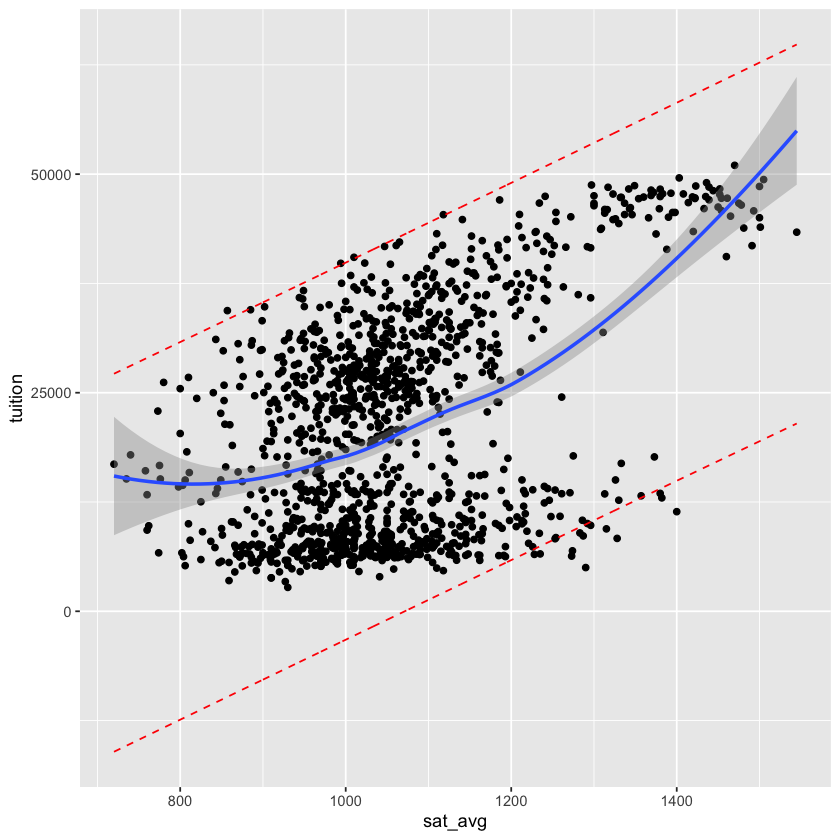

In [136]:
#  Build linear model 
library("ggplot2")
model <- lm(tuition ~ sat_avg, college)
# 1. Add predictions    
pred.int <- predict(model, interval = "prediction")
mydata <- cbind(college, pred.int)
# 2. Regression line + confidence intervals        


p <- ggplot(mydata, aes(sat_avg, tuition)) +
  geom_point() +
  stat_smooth(method = "loess")
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = upr), color = "red", linetype = "dashed")


Warning message in predict.lm(model, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


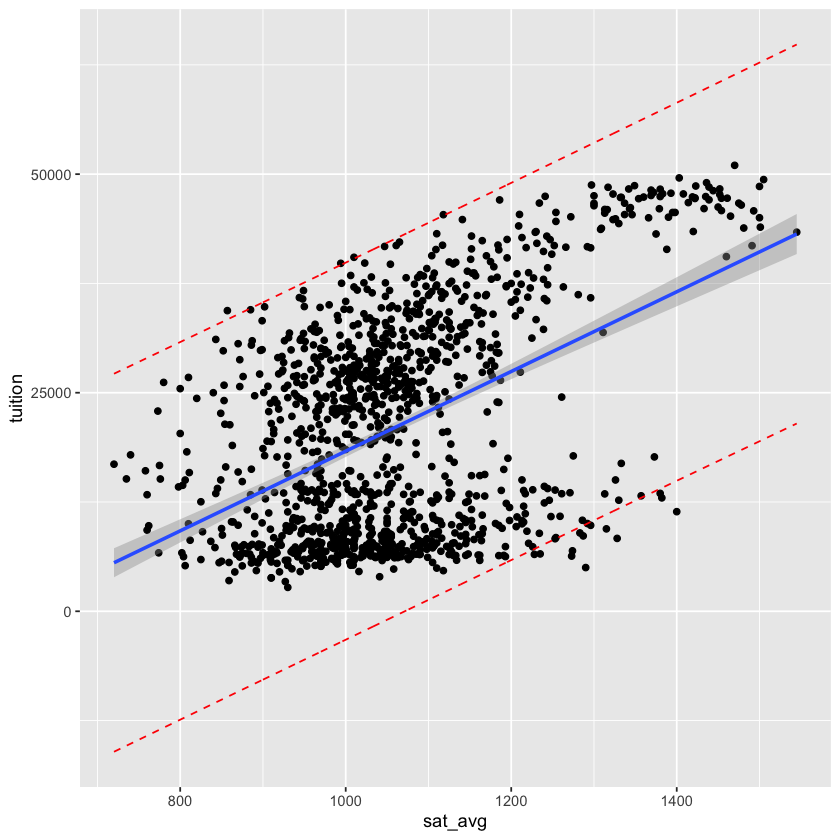

In [88]:
# 0. Build linear model 

model <- lm(tuition ~ sat_avg, college)
# 1. Add predictions    
pred.int <- predict(model, interval = "prediction")
mydata <- cbind(college, pred.int)
# 2. Regression line + confidence intervals        
library("ggplot2")

p <- ggplot(mydata, aes(sat_avg, tuition)) +
  geom_point() +
  stat_smooth(method = lm)
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
    geom_line(aes(y = upr), color = "red", linetype = "dashed")


In [94]:
# 0. Build linear model 

model <- lm(tuition ~ sat_avg, college)
# 1. Add predictions    
pred.int <- predict(model, interval = "prediction")
mydata <- cbind(college, pred.int)
head(mydata)



Warning message in predict.lm(model, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


,X,id,name,city,state,region,highest_degree,control,gender,admission_rate,⋯,undergrads,tuition,faculty_salary_avg,loan_default_rate,median_debt,lon,lat,fit,lwr,upr
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,102669,Alaska Pacific University,Anchorage,AK,West,Graduate,Private,CoEd,0.4207,⋯,275,19610,5804,0.077,23250.0,-149.90028,61.21806,20773.75,-791.0097,42338.52
2,2,101648,Marion Military Institute,Marion,AL,South,Associate,Public,CoEd,0.6139,⋯,433,8778,5916,0.136,11500.0,-87.31917,32.63235,20819.33,-745.4265,42384.09
3,3,100830,Auburn University at Montgomery,Montgomery,AL,South,Graduate,Public,CoEd,0.8017,⋯,4304,9080,7255,0.106,21335.0,-86.29997,32.36681,18722.73,-2843.2456,40288.70
4,4,101879,University of North Alabama,Florence,AL,South,Graduate,Public,CoEd,0.6788,⋯,5485,7412,7424,0.111,21500.0,-87.67725,34.79981,19634.29,-1930.9007,41199.49
5,5,100858,Auburn University,Auburn,AL,South,Graduate,Public,CoEd,0.8347,⋯,20514,10200,9487,0.045,21831.0,-85.48078,32.60986,28111.87,6535.5148,49688.22
6,6,100663,University of Alabama at Birmingham,Birmingham,AL,South,Graduate,Public,CoEd,0.8569,⋯,11383,7510,9957,0.062,21941.5,-86.80249,33.52066,23189.41,1623.5746,44755.24


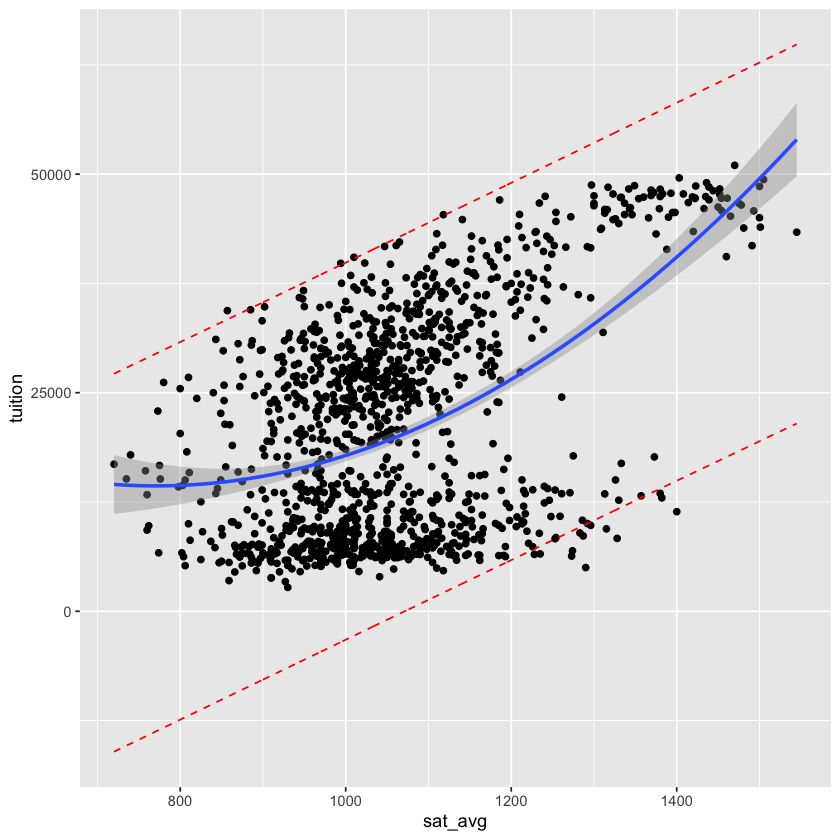

In [116]:
# 2. Regression line + confidence intervals        
library("ggplot2")
p <- ggplot(mydata, aes(sat_avg, tuition)) +
  geom_point() +
  stat_smooth(method = "lm" , formula= y ~ x+ I(x^2), size=1)
# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed")+
 geom_line(aes(y = upr), color = "red", linetype = "dashed")



# _Workshop 2_
## <center>Multiple linear regression-1</center>

- Multiple linear regression is an extension of simple linear regression for predicting an outcome variable (y) on the basis of multiple distinct predictor variables (x).

For example, with three predictor variables (x), the prediction of y is expressed by the following equation: y = b0 + b1*x1 + b2*x2 + b3*x3

The regression beta coefficients measure the association between each predictor variable and the outcome. “b_j” can be interpreted as the average effect on y of a one unit increase in “x_j”, holding all other predictors fixed.

In this section, we’ll build a multiple regression model to predict **_tuition_**  based on the **faculty_salary_avg** , **admission_rate** and **median_debt**. The formula is as follow: sales = b0 + b1*faculty_salary_avg + b2*admission_rate + b3*median_debt

You can compute the multiple regression model coefficients in R as follow:

In [104]:
names(college)

[1] "X"                  "id"                 "name"              
 [4] "city"               "state"              "region"            
 [7] "highest_degree"     "control"            "gender"            
[10] "admission_rate"     "sat_avg"            "undergrads"        
[13] "tuition"            "faculty_salary_avg" "loan_default_rate" 
[16] "median_debt"        "lon"                "lat"

In [117]:
head(college[, c(10, 11,13,14,16,17,18 )])

,admission_rate,sat_avg,tuition,faculty_salary_avg,median_debt,lon,lat
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0.4207,1054,19610,5804,23250.0,-149.90028,61.21806
2,0.6139,1055,8778,5916,11500.0,-87.31917,32.63235
3,0.8017,1009,9080,7255,21335.0,-86.29997,32.36681
4,0.6788,1029,7412,7424,21500.0,-87.67725,34.79981
5,0.8347,1215,10200,9487,21831.0,-85.48078,32.60986
6,0.8569,1107,7510,9957,21941.5,-86.80249,33.52066


In [118]:
model_Mlm <- lm(tuition ~ faculty_salary_avg + admission_rate + median_debt, 
            data = train.data)
summary(model_Mlm)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.790293e+03,2.977862e+03,-1.608635,1.080078e-01
faculty_salary_avg,1.605982e+00,1.712421e-01,9.378430,4.245186e-20
admission_rate,-1.317369e+04,1.966396e+03,-6.699410,3.465342e-11
median_debt,9.379087e-01,8.111097e-02,11.563277,3.895344e-29


From the output above, the coefficients table shows the beta coefficient estimates and their significance levels. Columns are:

_**Estimate**_: the intercept $\beta_0$ and the beta coefficient estimates associated to each predictor variable

_**Std.Error**_: the standard error of the coefficient estimates. This represents the accuracy of the coefficients. The larger the standard error, the less confident we are about the estimate.

_**t value**_: the t-statistic, which is the coefficient estimate (column 2) divided by the standard error of the estimate (column 3)

_**Pr(>|t|)**_: The p-value corresponding to the t-statistic. The smaller the p-value, the more significant the estimate is.

In [119]:
range(college$admission_rate)

[1] 0.0509 1.0000

-As previously described, you can easily make predictions using the R function predict():

In [123]:
newdata <- data.frame(
  faculty_salary_avg = 15000, admission_rate = 0.6,
  median_debt = 5000
)
# Predict tuition values
model_Mlm  %>% predict(newdata)

1 
16084.77

In [124]:
range(college$faculty_salary_avg)

[1]  1451 20650

### Interpretation

Before using a model for predictions, you need to assess the statistical significance of the model. This can be easily checked by displaying the statistical summary of the model.

### Model summary

Display the statistical summary of the model as follow:

In [126]:
summary(model_Mlm)


Call:
lm(formula = tuition ~ faculty_salary_avg + admission_rate + 
    median_debt, data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-31656 -10015    479   9313  26342 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -4.790e+03  2.978e+03  -1.609    0.108    
faculty_salary_avg  1.606e+00  1.712e-01   9.378  < 2e-16 ***
admission_rate     -1.317e+04  1.966e+03  -6.699 3.47e-11 ***
median_debt         9.379e-01  8.111e-02  11.563  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11210 on 1013 degrees of freedom
Multiple R-squared:  0.204,	Adjusted R-squared:  0.2016 
F-statistic: 86.52 on 3 and 1013 DF,  p-value: < 2.2e-16


### The summary outputs shows 6 components, including:

- Call. Shows the function call used to compute the regression model.
- Residuals. Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, the median should not be far from zero, and the minimum and maximum should be roughly equal in absolute value.
- Coefficients. Shows the regression beta coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.

_The hypothesis test that the slope of faculty_salary_avg =0

|t value|    Pr|
|:---|----:|
 |9.378  |  < 2e-16 *** |
 
 

- Residual standard error (RSE), R-squared (R2) and the F-statistic are metrics that are used to check how well the model fits to our data.
        - The residual Standard Error Gives a nidea how far observed tuition (y values) are from the predicted or fitted tuition  ( the y_hats). It gives us an idea oa typical sized residual or error.
        
$$e=y -\hat y$$        
        - 20.4% of variation in Tuition can be explained by our model (faculty_salary_avg + admission_rate + 
    median_deb)
        - F-statistic adn P value for an overall test of significance of the model. It tests teh null hypothesis that all the model coefficients are ZERO. H0.  Here it tests:


$$\beta_0=\beta_1=\beta_2$$

 - The p-value is the probability of observing our sample statistic or one more extreme given the assumption $H_0$ is true.  _if $H_0$=True how likely are we to get a sample statistic that is far or farther from the hypothethized value in terms of standard errors by chance?"
 - T-statistic : tells us how far our sample statistic is from th ehypothesized value for it, in terms of the "average deviation from the hypothesized value for the statistic"


 - The first step in interpreting the multiple regression analysis is to examine the F-statistic and the associated p-value, at the bottom of model summary.

### Coefficients significance

To see which predictor variables are significant, you can examine the coefficients table, which shows the estimate of regression beta coefficients and the associated t-statistic p-values.

In [128]:
summary(model_Mlm)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.790293e+03,2.977862e+03,-1.608635,1.080078e-01
faculty_salary_avg,1.605982e+00,1.712421e-01,9.378430,4.245186e-20
admission_rate,-1.317369e+04,1.966396e+03,-6.699410,3.465342e-11
median_debt,9.379087e-01,8.111097e-02,11.563277,3.895344e-29


- For a given  predictor, the t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero.

- It can be seen that, changing in **median_debt** and **faculty_salary_avg** values are not significantly associated to changes in **tuition**  while changes in **admission_rate** is  significantly associated with **tuition** value.

In [129]:
# confidence intervals for the model coefficients
confint(model_Mlm, level = 0.95)

,2.5 %,97.5 %
(Intercept),-1.063378e+04,1053.191370
faculty_salary_avg,1.269952e+00,1.942012
admission_rate,-1.703237e+04,-9315.015408
median_debt,7.787439e-01,1.097073


- for faculty_salary_avg coefficient which is 1.605982, we are 95% confident the true slope is between :
1.269952  and  1.942012

## check correlation visually

In [ ]:
install.packages("GGally")

In [ ]:
library(GGally)

In [ ]:
ggpairs(college[, c(10, 11,13,14,16,17,18 )])

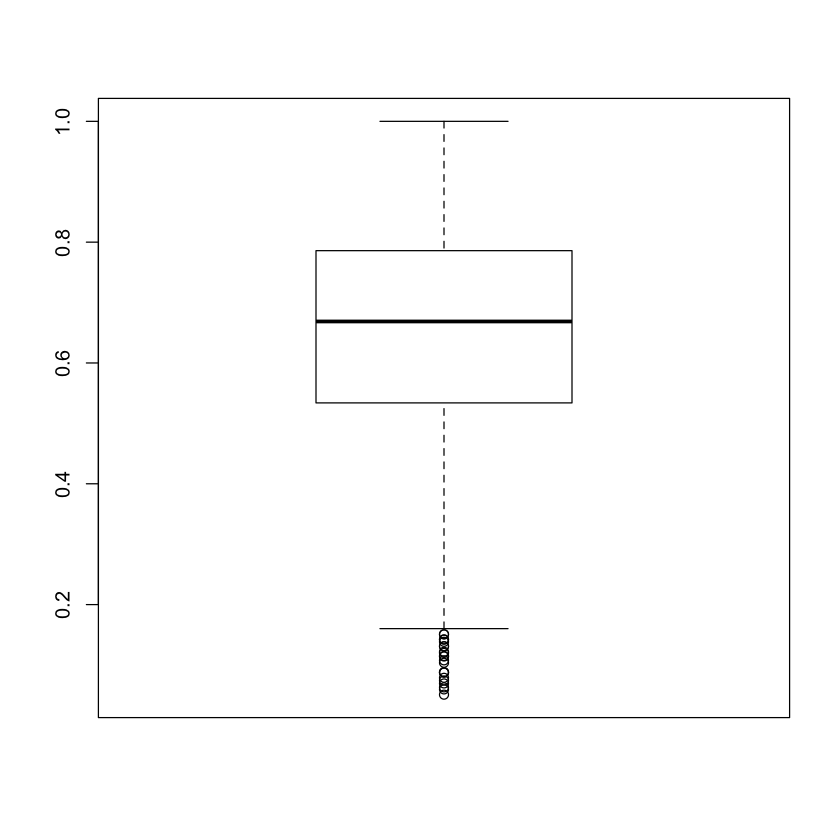

In [137]:
boxplot(college$admission_rate)

In [194]:
model_Mlm1 <- lm(tuition ~ sat_avg + admission_rate + log(median_debt), 
            data = train.data)
summary(model_Mlm1)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-224583.75521,15502.786349,-14.486670,2.311650e-43
sat_avg,48.97996,2.644245,18.523234,3.388287e-66
admission_rate,-7783.34893,1814.781056,-4.288864,1.967641e-05
log(median_debt),19791.32851,1471.936432,13.445777,4.829762e-38


In [195]:
glimpse(college)

Observations: 1,269
Variables: 18
$ X                  <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ id                 <int> 102669, 101648, 100830, 101879, 100858, 100663, 10…
$ name               <fct> Alaska Pacific University, Marion Military Institu…
$ city               <fct> Anchorage, Marion, Montgomery, Florence, Auburn, B…
$ state              <fct> AK, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL…
$ region             <fct> West, South, South, South, South, South, South, So…
$ highest_degree     <fct> Graduate, Associate, Graduate, Graduate, Graduate,…
$ control            <fct> Private, Public, Public, Public, Public, Public, P…
$ gender             <fct> CoEd, CoEd, CoEd, CoEd, CoEd, CoEd, CoEd, CoEd, Co…
$ admission_rate     <dbl> 0.4207, 0.6139, 0.8017, 0.6788, 0.8347, 0.8569, 0.…
$ sat_avg            <int> 1054, 1055, 1009, 1029, 1215, 1107, 1041, 1165, 10…
$ undergrads         <int> 275, 433, 4304, 5485, 20514, 11383, 7060, 3033, 26…
$ tuition         

In [196]:
summary(model_Mlm1)


Call:
lm(formula = tuition ~ sat_avg + admission_rate + log(median_debt), 
    data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-29813  -8635    943   8317  32501 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.246e+05  1.550e+04 -14.487  < 2e-16 ***
sat_avg           4.898e+01  2.644e+00  18.523  < 2e-16 ***
admission_rate   -7.783e+03  1.815e+03  -4.289 1.97e-05 ***
log(median_debt)  1.979e+04  1.472e+03  13.446  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10140 on 1013 degrees of freedom
Multiple R-squared:  0.349,	Adjusted R-squared:  0.3471 
F-statistic:   181 on 3 and 1013 DF,  p-value: < 2.2e-16


### Finally, our model equation can be written as follow: tuition = -32520+44.787\*sat_avg + 94.548\*lon +372.519\*lat

### Model accuracy

Once you identified that, at least, one predictor variable is significantly associated to the outcome, you should continue the diagnostic by checking how well the model fits the data. This process is also referred to as the goodness-of-fit

The overall quality of the linear regression fit can be assessed using the following three quantities, displayed in the model summary:

Residual Standard Error (RSE),
R-squared (R2) and adjusted R2,
F-statistic, which has been already described in the previous section



|RSE|r.squared| f.statistic|p.value|
|------|-----|----|-----|
| 10010| 0.2623|120 |<2.2e-16 |


In [197]:
anova(model_Mlm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
sat_avg,1,36517662476,36517662476,355.127472,3.835012e-68
admission_rate,1,730172511,730172511,7.100792,7.827462e-03
log(median_debt),1,18590474970,18590474970,180.788910,4.829762e-38
Residuals,1013,104166517552,102829731,NA,NA


### Residual standard error (RSE).
The RSE (or model sigma), corresponding to the prediction error, represents roughly the average difference between the observed outcome values and the predicted values by the model. The lower the RSE the best the model fits to our data.

Dividing the RSE by the average value of the outcome variable will give you the prediction error rate, which should be as small as possible.

In our example, using sat_avg, lon and lat predictor variables, the RSE = 10140	, meaning that the observed tuition values deviate from the predicted values by approximately 10140$ in average.



In [198]:
### This corresponds to an error rate of 10140/mean(train.data$tuition) = 48.4%, which is too high
10140/mean(train.data$tuition)

[1] 0.4839983

### R-squared and Adjusted R-squared:
The R-squared (R2) ranges from 0 to 1 and represents the proportion of variation in the outcome variable that can be explained by the model predictor variables.

For a simple linear regression, R2 is the square of the Pearson correlation coefficient between the outcome and the predictor variables. In multiple linear regression, the R2 represents the correlation coefficient between the observed outcome values and the predicted values.

The R2 measures, how well the model fits the data. The higher the R2, the better the model. However, a problem with the R2, is that, it will always increase when more variables are added to the model, even if those variables are only weakly associated with the outcome (James et al. 2014). A solution is to adjust the R2 by taking into account the number of predictor variables.

The adjustment in the “Adjusted R Square” value in the summary output is a correction for the number of x variables included in the predictive model.

So, you should mainly consider the adjusted R-squared, which is a penalized R2 for a higher number of predictors.

An (adjusted) R2 that is close to 1 indicates that a large proportion of the variability in the outcome has been explained by the regression model.
A number near 0 indicates that the regression model did not explain much of the variability in the outcome.

- In our example, the adjusted R2 is 0.2623, which is not good.

## F-Statistic:
Recall that, the F-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient.

In a simple linear regression, this test is not really interesting since it just duplicates the information given by the t-test, available in the coefficient table.

The F-statistic becomes more important once we start using multiple predictors as in multiple linear regression.


|Fstatistics معيار|
|-------|
|-A large F-statistic will corresponds to a statistically significant p-value (p < 0.05). In our example, the F-statistic equal 644 producing a p-value of 1.46e-42, which is highly significant-.|




## Making predictions

We’ll make predictions using the test data in order to evaluate the performance of our regression model.

The procedure is as follow:

- Predict the tuition values based on sat_avg, lon et lat  in the test data
    -  Assess the model performance by computing:
The prediction error RMSE (Root Mean Squared Error), representing the average difference between the observed known outcome values in the test data and the predicted outcome values by the model. The lower the RMSE, the better the model.
    - The R-square (R2), representing the correlation between the observed outcome values and the predicted outcome values. The higher the R2, the better the model.

In [199]:
# Make predictions
predictions <- model_Mlm1 %>% predict(test.data)
# Model performance
# (a) Compute the prediction error, RMSE
RMSE(predictions, test.data$tuition)

[1] 10179.56

In [200]:
# (b) Compute R-square
R2(predictions, test.data$tuition)

[1] 0.3404428

From the output above, the R2 is 0.34, meaning that the observed and the predicted outcome values are less correlated, which is not a good rsult.


In [201]:
10179.56/mean(test.data$tuition)
# The prediction error RMSE is 1.58, representing an error rate of:
# 10179.56/mean(test.data$tuition) 

[1] 0.4773585

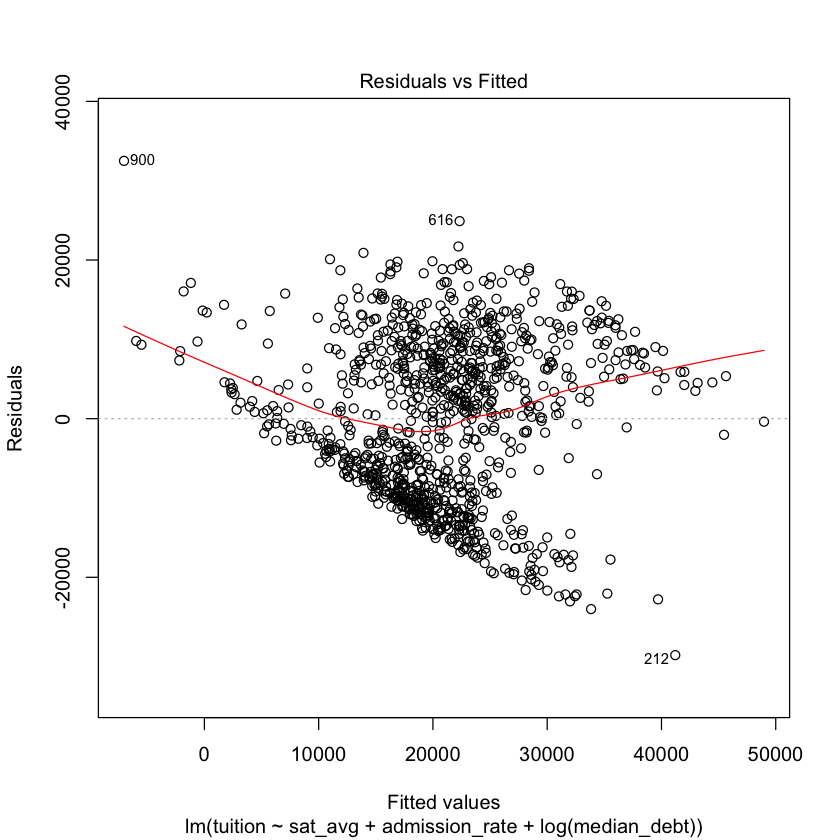

In [204]:
plot(model_Mlm1,  which=1)

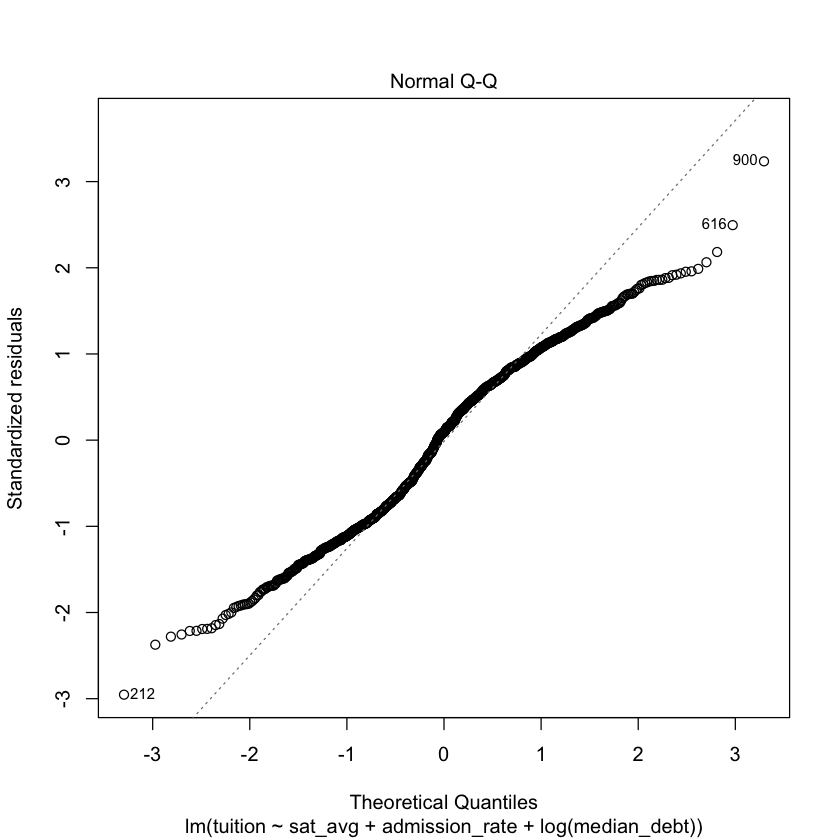

In [203]:
plot(model_Mlm1,  which=2)

# _Workshop 2_
## <center>Multiple linear regression-2</center>

In [176]:
df<-data.frame(Months.Emp=c(37, 41, 106, 76, 100, 22, 12, 10, 50), ItemSold=c(250, 275, 296, 317, 320, 162, 150, 134, 300))
head(df)
attach(df)

,Months.Emp,ItemSold
,<dbl>,<dbl>
1,37,250
2,41,275
3,106,296
4,76,317
5,100,320
6,22,162


The following objects are masked from df (pos = 3):

    ItemSold, Months.Emp




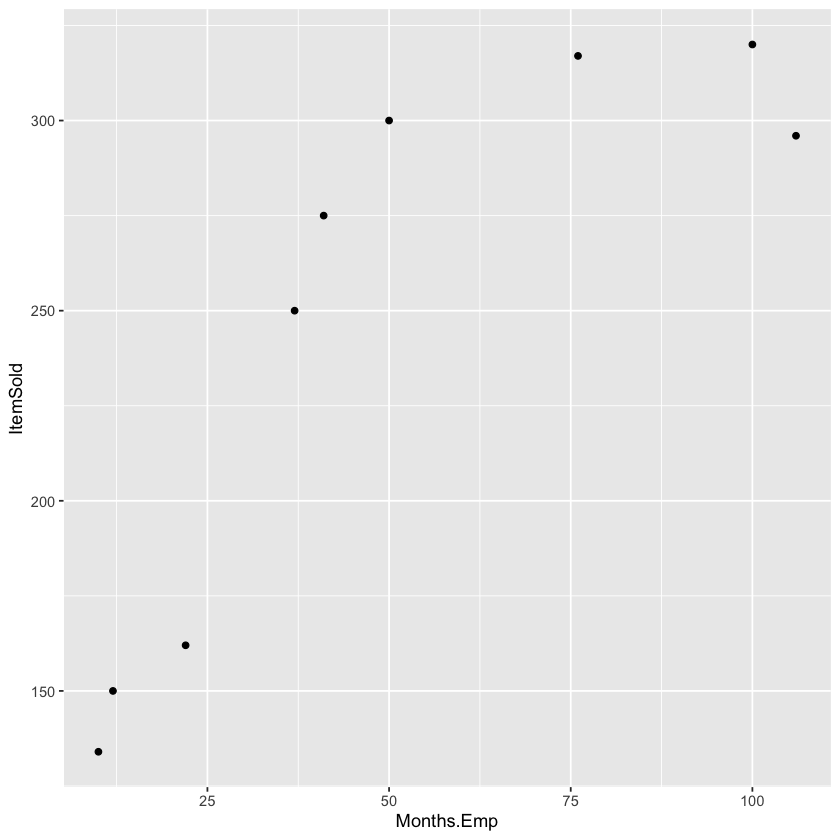

In [177]:
ggplot(df) +
geom_point( aes(Months.Emp, ItemSold))

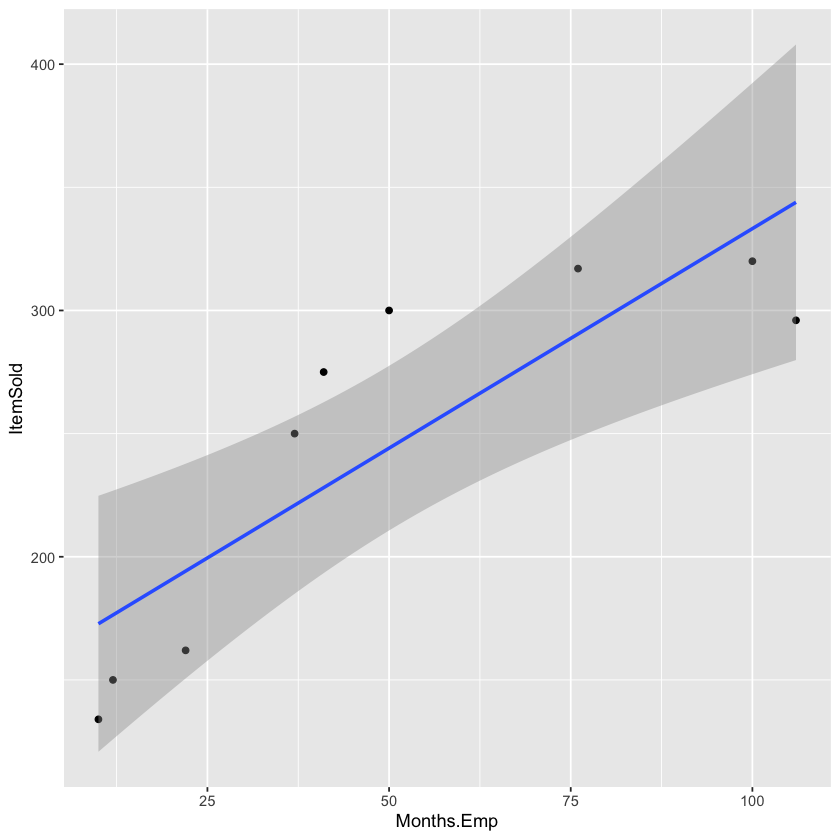

In [178]:
# in a linear  regression model we have 
ggplot(df,  aes(Months.Emp, ItemSold))+
geom_point()+
geom_smooth(method="lm")

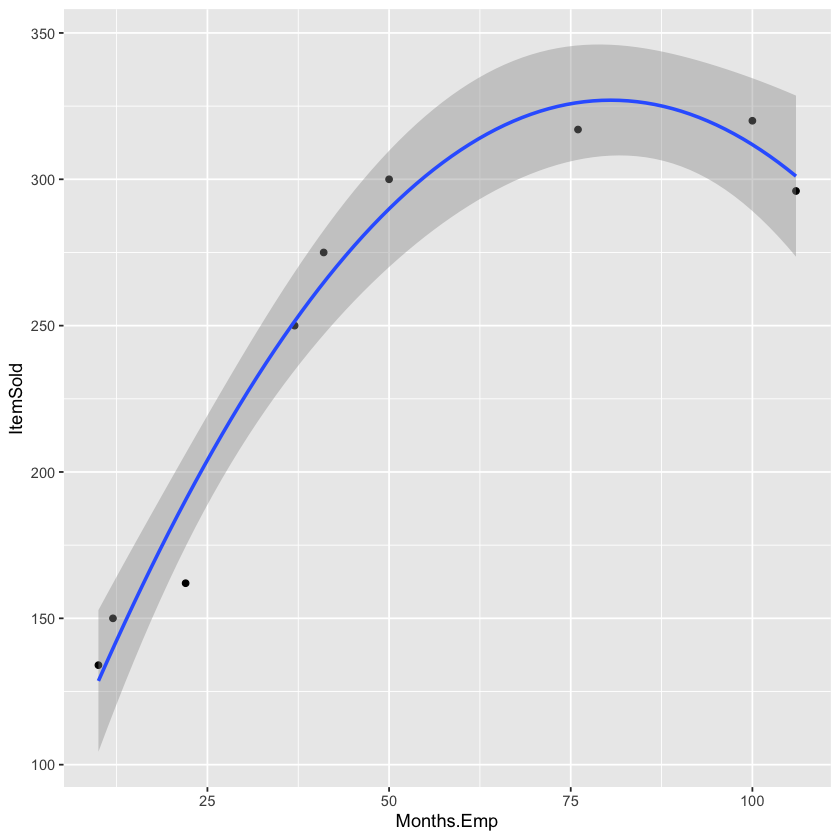

In [179]:
# can we do better?
ggplot(df,  aes(x=Months.Emp, y=ItemSold))+
geom_point()+
geom_smooth(method="lm", formula = y ~ x + I(x^2))

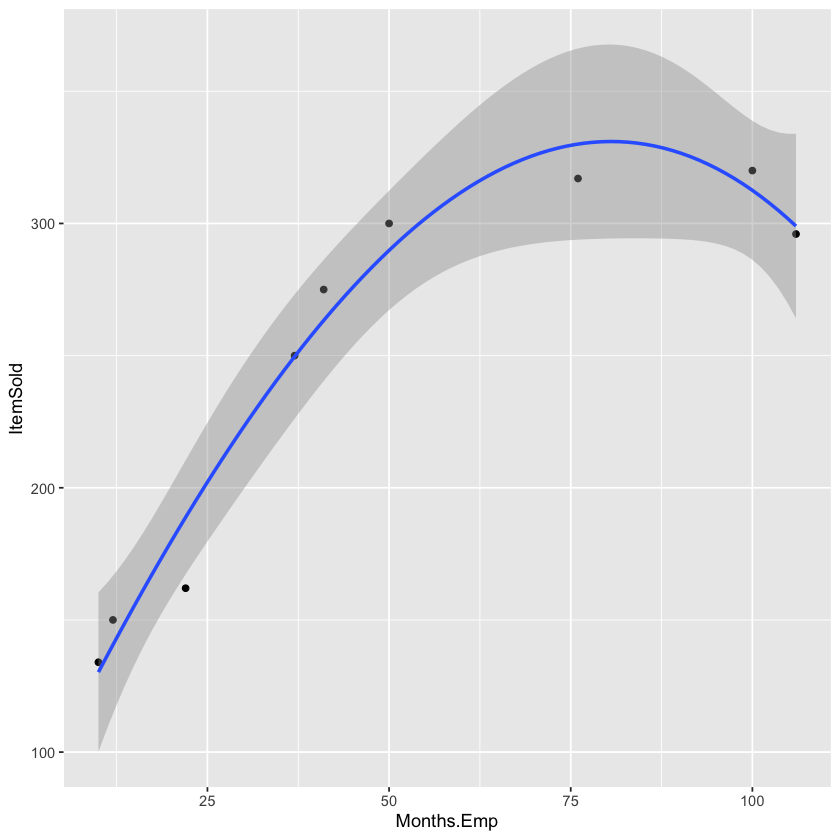

In [180]:
# can we do better?
ggplot(df,  aes(x=Months.Emp, y=ItemSold))+
geom_point()+
geom_smooth(method="lm", formula = y ~ x + I(x^2)+ I(x^3))

In [181]:
x=Months.Emp; y=ItemSold
model<- lm(y ~ x+ I(x^2), df)

In [182]:
summary(model)


Call:
lm(formula = y ~ x + I(x^2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.411  -5.074   5.383  10.111  10.285 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 68.340866  15.049328   4.541 0.003929 ** 
x            6.426818   0.667550   9.627 7.19e-05 ***
I(x^2)      -0.039917   0.005599  -7.130 0.000383 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.88 on 6 degrees of freedom
Multiple R-squared:  0.9709,	Adjusted R-squared:  0.9611 
F-statistic: 99.94 on 2 and 6 DF,  p-value: 2.475e-05


- Adjusted R-squared reflects the fit of the model, where a higher value generally indicates a better fit
Intercept coefficient is the Y-intercept
- Months.Emp coefficient is the change in Y due to a change of one unit in the ItemSold rate (everything else held constant)
- Std. Error reflects the level of accuracy of the coefficients
- Pr(>|t|) is the p-value. A p-value of less than 0.05 is considered to be statistically significant

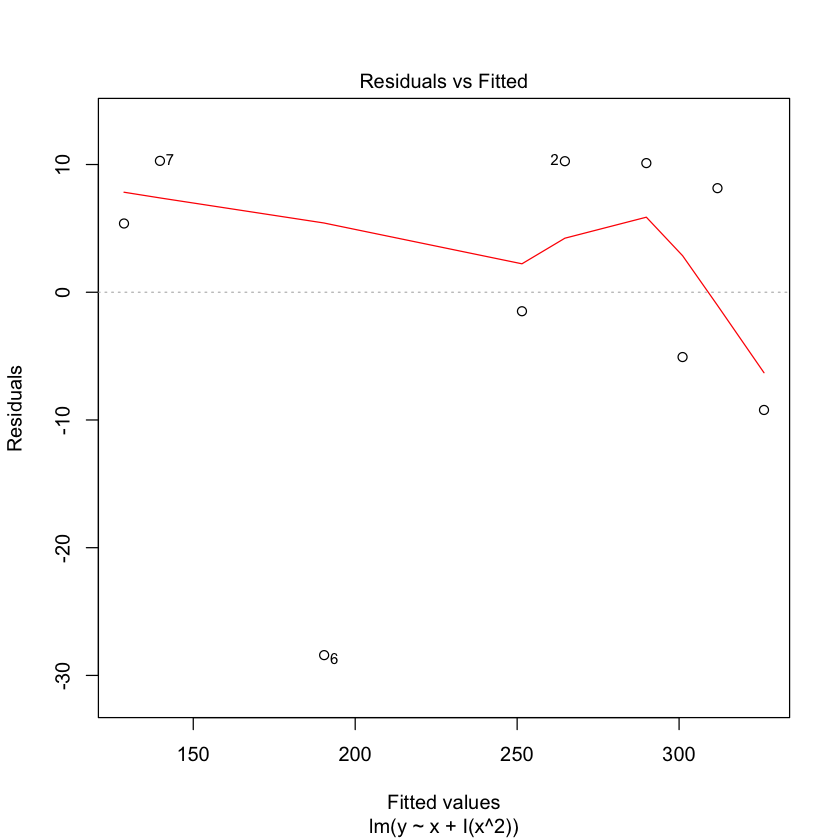

In [190]:
plot(model, which=1)

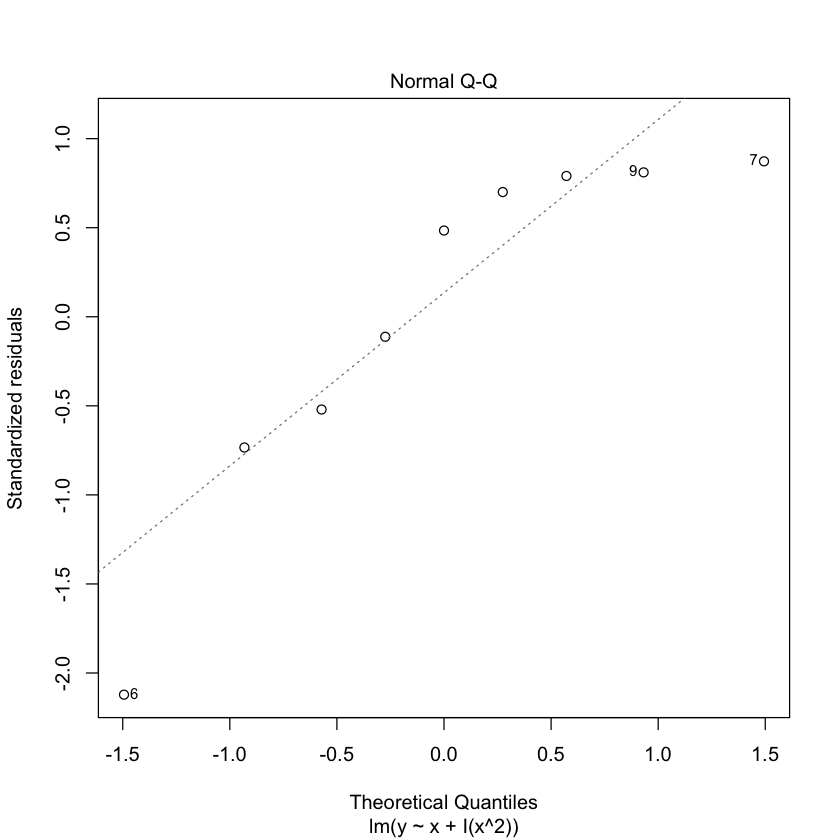

In [191]:
plot(model, which=2)

 - (Q-Q) plot, shows the distribution of the data against the expected normal distribution. For normally distributed data, observations should lie approximately on a straight line.

In [187]:
anova(QLm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Months.Emp,1,33008.126,33008.1261,149.04542,1.837944e-05
I(Months.Emp^2),1,11257.982,11257.9816,50.83447,3.832299e-04
Residuals,6,1328.781,221.4635,NA,NA


In [193]:
# Prediction
newDf<- c(20, 30, 70)
newdata = data.frame(Months.Emp = newDf, EmpSq=newDf^2)
predict(QLm, newdata)

1        2        3 
180.9104 225.2199 322.6239